<a href="https://colab.research.google.com/github/MuhammadFirmansyah14/histogramEquilezation/blob/main/vehicle_part_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Install necessary libraries
!pip install ultralytics  # Install YOLOv8
!pip install matplotlib opencv-python-headless
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.4/904.4 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
# Step 2: Import libraries
import matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab import files
import cv2
import numpy as np




Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="p9AE4cfyWZVtKr7MenmF")
# project = rf.workspace("testingws").project("object-detection-bbaki")
# version = project.version(3)
# dataset = version.download("yolov8")

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4gEbZ28NJvB2NPSkRws0")
project = rf.workspace("testimage-dak0u").project("detect-vehicle-part")
version = project.version(1)
dataset = version.download("yolov8")







loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to detect-vehicle-part-1 in yolov8:: 100%|██████████| 742/742 [00:00<00:00, 5257.75it/s]


In [ ]:
import os

# Lihat folder tempat dataset diunduh
dataset_location = dataset.location  # dari RoboFlow download
print("Dataset downloaded to:", dataset_location)

Dataset downloaded to: /content/detect-vehicle-part-1


In [ ]:
from ultralytics import YOLO

# Buat model YOLOv8 baru
model = YOLO("yolov8n.pt")  # "yolov8n.pt" adalah versi YOLOv8 Nano

# Jalankan pelatihan dengan dataset
model.train(data="/content/detect-vehicle-part-1/data.yaml", epochs=25, imgsz=320)

100%|██████████| 6.25M/6.25M [00:00<00:00, 50.5MB/s]


Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/detect-vehicle-part-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

100%|██████████| 755k/755k [00:00<00:00, 14.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/detect-vehicle-part-1/train/labels... 319 images, 0 backgrounds, 0 corrupt: 100%|██████████| 319/319 [00:00<00:00, 1116.90it/s]

train: New cache created: /content/detect-vehicle-part-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/detect-vehicle-part-1/valid/labels... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<00:00, 1731.73it/s]

val: New cache created: /content/detect-vehicle-part-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25         0G      1.755      2.634      1.406         66        320: 100%|██████████| 20/20 [01:11<00:00,  3.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.63s/it]

                   all         31        109      0.826      0.784      0.794      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25         0G      1.444      1.323      1.156         95        320: 100%|██████████| 20/20 [01:09<00:00,  3.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]

                   all         31        109      0.929      0.715      0.877      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25         0G      1.269      1.156      1.097         54        320: 100%|██████████| 20/20 [01:09<00:00,  3.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]

                   all         31        109      0.927      0.819      0.878      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25         0G      1.247      1.085      1.071         75        320: 100%|██████████| 20/20 [01:08<00:00,  3.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]

                   all         31        109      0.858      0.718       0.83       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25         0G      1.255      1.043      1.087         92        320: 100%|██████████| 20/20 [01:07<00:00,  3.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]

                   all         31        109      0.853      0.752      0.793      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25         0G      1.214      1.031      1.096         91        320: 100%|██████████| 20/20 [01:07<00:00,  3.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.48s/it]

                   all         31        109      0.888      0.835      0.874      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25         0G      1.201      1.048      1.091         63        320: 100%|██████████| 20/20 [01:06<00:00,  3.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.76s/it]

                   all         31        109      0.894      0.789      0.875      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25         0G      1.125     0.9403      1.065         64        320: 100%|██████████| 20/20 [01:10<00:00,  3.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]

                   all         31        109      0.876      0.844      0.905      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25         0G      1.118     0.9006      1.063         63        320: 100%|██████████| 20/20 [01:08<00:00,  3.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]

                   all         31        109      0.901      0.839      0.916      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25         0G      1.108     0.9099      1.042         65        320: 100%|██████████| 20/20 [01:07<00:00,  3.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.53s/it]

                   all         31        109      0.901      0.836      0.907       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25         0G      1.061     0.8551       1.04         59        320: 100%|██████████| 20/20 [01:07<00:00,  3.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]

                   all         31        109      0.949      0.846      0.941      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25         0G      1.015     0.8049      1.013         68        320: 100%|██████████| 20/20 [01:07<00:00,  3.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]

                   all         31        109       0.88      0.879      0.929      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25         0G     0.9757     0.7974      0.998         72        320: 100%|██████████| 20/20 [01:07<00:00,  3.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.65s/it]

                   all         31        109      0.912      0.862      0.922      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25         0G      0.964     0.7821     0.9962         74        320: 100%|██████████| 20/20 [01:06<00:00,  3.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]

                   all         31        109      0.876       0.84      0.912       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25         0G     0.9853     0.7683     0.9907         76        320: 100%|██████████| 20/20 [01:06<00:00,  3.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.57s/it]

                   all         31        109      0.927      0.844      0.927      0.587


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25         0G     0.9496      0.801       1.02         41        320: 100%|██████████| 20/20 [01:08<00:00,  3.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.16s/it]

                   all         31        109      0.968      0.807      0.886      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25         0G     0.8786     0.7578     0.9788         49        320: 100%|██████████| 20/20 [01:06<00:00,  3.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]

                   all         31        109      0.978      0.807      0.928       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25         0G     0.8972     0.7362     0.9916         50        320: 100%|██████████| 20/20 [01:06<00:00,  3.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]

                   all         31        109      0.907      0.806      0.899      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25         0G       0.91     0.7282     0.9832         52        320: 100%|██████████| 20/20 [01:07<00:00,  3.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.73s/it]

                   all         31        109      0.929      0.844      0.932      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25         0G     0.8303     0.7006     0.9546         47        320: 100%|██████████| 20/20 [01:07<00:00,  3.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]

                   all         31        109      0.932      0.899      0.956      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25         0G     0.8189     0.6724     0.9526         44        320: 100%|██████████| 20/20 [01:07<00:00,  3.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]

                   all         31        109       0.93      0.908      0.959      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25         0G     0.7967     0.6681     0.9571         48        320: 100%|██████████| 20/20 [01:06<00:00,  3.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]

                   all         31        109      0.952      0.905      0.959      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25         0G     0.7536     0.6305     0.9405         43        320: 100%|██████████| 20/20 [01:08<00:00,  3.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]

                   all         31        109      0.874      0.893      0.945      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25         0G     0.7611     0.6312     0.9356         46        320: 100%|██████████| 20/20 [01:07<00:00,  3.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]

                   all         31        109       0.95      0.865      0.948       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25         0G     0.7312     0.5926     0.9264         44        320: 100%|██████████| 20/20 [01:06<00:00,  3.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]

                   all         31        109      0.908      0.908      0.949      0.709



25 epochs completed in 0.498 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.29s/it]


                   all         31        109      0.952      0.907      0.959      0.719
Speed: 1.4ms preprocess, 66.0ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f99ac699a80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
from ultralytics import YOLO

# Muat model terlatih
model = YOLO("/content/runs/detect/train/weights/best.pt")


In [ ]:
dataset = version.download("yolov8")

In [ ]:
# result = model.predict(source="/content/gol3.png", save=True, imgsz=320)

image_path = "/content/img8.jpg"
gray_image_path = "/content/img1_gray.png"

# Baca gambar
image = cv2.imread(image_path)

# Ubah ke grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Simpan gambar grayscale
cv2.imwrite(gray_image_path, gray_image)



result = model.predict(source="/content/img8.jpg", imgsz=640, save=True)



image 1/1 /content/img8.jpg: 384x640 (no detections), 501.4ms
Speed: 15.5ms preprocess, 501.4ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


Total Bounding Boxes: 0


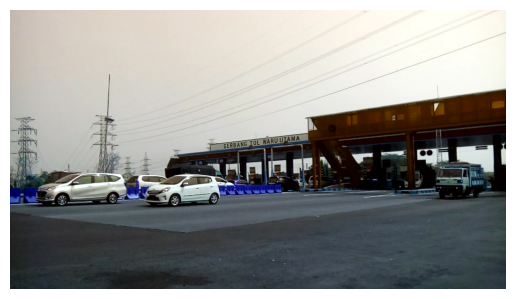

In [ ]:
# Ambil elemen pertama dari hasil prediksi
image_result = result[0]

# Ekstrak bounding box, confidence, dan class
for box in image_result.boxes.data:
    # box adalah tensor [x_min, y_min, x_max, y_max, confidence, class]
    x_min, y_min, x_max, y_max, confidence, class_id = box.tolist()

    # Cetak bounding box
    print(f"Bounding Box: ({x_min:.2f}, {y_min:.2f}, {x_max:.2f}, {y_max:.2f})")
    print(f"Confidence: {confidence:.2f}")
    print(f"Class ID: {int(class_id)}")

# Menghitung jumlah bounding box
total_bounding_boxes = len(image_result.boxes.data)
print(f"Total Bounding Boxes: {total_bounding_boxes}")

# Menampilkan hasil deteksi
from IPython.display import Image, display
image_path_with_predictions = image_result.plot()  # Mengembalikan array gambar

# Tampilkan menggunakan Matplotlib
import matplotlib.pyplot as plt
plt.imshow(image_path_with_predictions)
plt.axis("off")
plt.show()

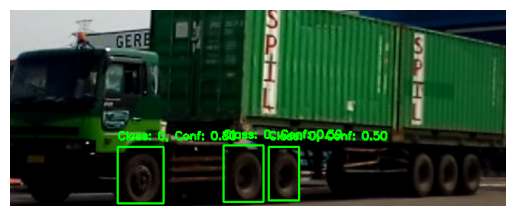

In [ ]:
import cv2

# Buka gambar asli
img = cv2.imread("/content/gol2.png")

# Loop untuk menggambar bounding box
for box in image_result.boxes.data:
    x_min, y_min, x_max, y_max, confidence, class_id = box.tolist()
    x_min, y_min, x_max, y_max = int(x_min), int(y_min), int(x_max), int(y_max)

    # Gambar bounding box
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
    label = f"Class: {int(class_id)}, Conf: {confidence:.2f}"
    cv2.putText(img, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Tampilkan gambar dengan Matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [ ]:
uo9kj,id !ls runs/detect/predict


ls: cannot access 'runs/detect/predict': No such file or directory


In [ ]:
# Step 3: Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

Saving tomat.jpg to tomat.jpg


In [ ]:
# Step 4: Load YOLO model
model = YOLO('yolov8n.pt')  # Use a pre-trained YOLOv8 model (nano version for speed)

100%|██████████| 6.25M/6.25M [00:00<00:00, 16.4MB/s]


In [ ]:
# Step 5: Perform object detection
results = model(image_path)  # Run inference on the uploaded image


image 1/1 /content/tomat.jpg: 448x640 8 apples, 3 oranges, 315.1ms
Speed: 18.5ms preprocess, 315.1ms inference, 32.2ms postprocess per image at shape (1, 3, 448, 640)


In [ ]:
# Step 6: Visualize results
# Save the annotated image
annotated_img = results[0].plot()  # Create an annotated image (numpy array)

In [ ]:
cv2.imwrite("runs/detect/predictions.jpg", annotated_img)

False

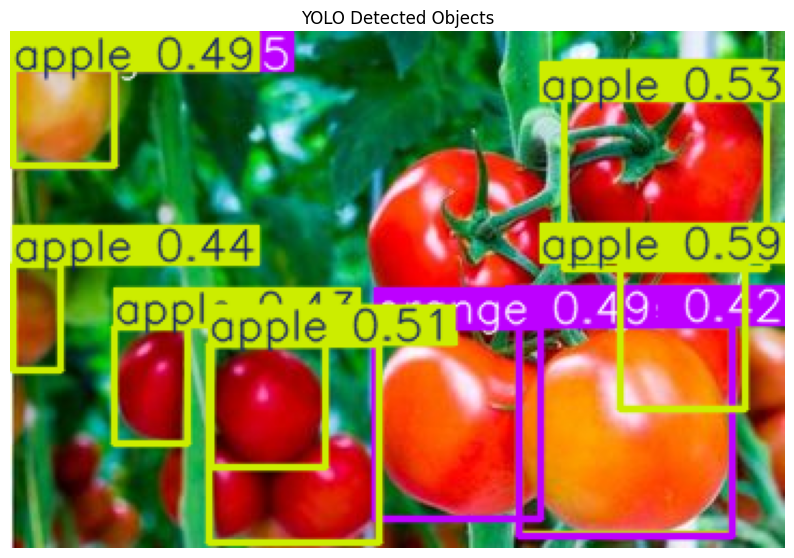

In [ ]:
# Display the annotated image using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("YOLO Detected Objects")
plt.show()